In [1]:
#importing necessary modules needed for computation
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

In [2]:
#importing our dataset 
dataset = pd.read_csv('C:/Users/godso/Downloads/energydata_complete.csv')
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
#checking number of rows and columns in the dataset
dataset.shape

(19735, 29)

In [4]:
#checking for missing data to avoid computational error
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
#renaming column headers for our dataset for easy manipulation

column_names= {'T1':'Temperature_in_kitchen',
               
               'T2':'Temperature_in_living_room_area',
               
               'RH_1':'Humidity_in_kitchen_area',
               
               'RH_2':'Humidity_in_living_room_area',
               
               'T3':'Temperature_in_laundry_room_area',
               
               'RH_3':'Humidity_in_laundry_room_area',
               
               'RH_4':'Humidity_in_office_room',
               
               'T5':'Temperature_in_bathroom',
               
                'RH_5':'Humidity_in_bathroom',

                'T6':'Temperature_outside_the_building',

                'RH_6':'Humidity_outside_the_building',

                'T7':'Temperature_in_ironing_room',

                'RH_7':'Humidity_in_ironing_room',

                'T8': 'Temperature_in_teenager_room_2',

                'RH_8': 'Humidity in teenager room 2',

                'T9': 'Temperature_in_parents_room',

                'RH_9': 'Humidity_in_parents_room'}

dataset = dataset.rename(columns = column_names)

In [6]:
#select a sample of the dataset
linear= dataset[['Temperature_in_living_room_area', 'Temperature_outside_the_building']].sample(15, random_state = 2)

<AxesSubplot:xlabel='Temperature_in_living_room_area', ylabel='Temperature_outside_the_building'>

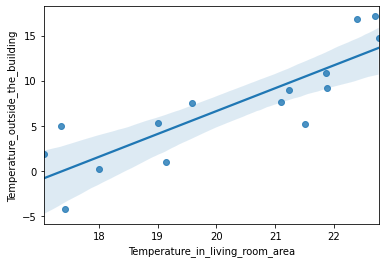

In [7]:
#regression plot
sns.regplot(x='Temperature_in_living_room_area', y='Temperature_outside_the_building', data = linear)

In [8]:
#segregating our hyperparameters to fit the linear model
target_df = dataset[['Temperature_in_living_room_area', 'Temperature_outside_the_building']]
x= target_df[['Temperature_in_living_room_area']]
y = target_df[['Temperature_outside_the_building']]
linear_model = LinearRegression().fit(x,y)

In [9]:
#calculating the rsquared value of the model
rsquared = r2_score(

    y_true = target_df['Temperature_outside_the_building'], 

    y_pred = linear_model.predict(target_df[['Temperature_in_living_room_area']])

)

round(rsquared, 2)

0.64

In [10]:
#intialising a new variable to normalise to a common scale using MinMaxScalar
new_data = dataset.drop(['date', 'lights'], axis= 1)
scaler = MinMaxScaler()
new_data = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)
new_data

,Appliances,Temperature_in_kitchen,Humidity_in_kitchen_area,Temperature_in_living_room_area,Humidity_in_living_room_area,Temperature_in_laundry_room_area,Humidity_in_laundry_room_area,T4,Humidity_in_office_room,Temperature_in_bathroom,...,Temperature_in_parents_room,Humidity_in_parents_room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [11]:
#segregating our data before they are split 
train_data = new_data.drop(['Appliances'], axis = 1)
y = new_data.Appliances

In [12]:
#splitting our dataset into test and train dataset
x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size = .3, random_state = 42
                                                   )

In [13]:
#fitting a new model 
new_model = LinearRegression()
new_model.fit(x_train, y_train)
predicted_values = new_model.predict(x_test)

In [14]:
#calculating the Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [15]:
#Calculating the Resifual Sum Of Squares
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [16]:
#calculating the Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [17]:
#calculating the Rsquared value
r2 = r2_score(y_test, predicted_values)
round(r2, 2)

0.15

In [18]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [19]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [20]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [21]:
linear_model_weights = get_weights_df(new_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [22]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [23]:
#checking for change in rmse
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse2, 3)

0.088

In [24]:
final_weights.max()

Features                               rv2
Linear_Model_Weight    101553272754.632446
Ridge_Weight                      0.511932
Lasso_weight                       0.01788
dtype: object

In [25]:
final_weights.min()

Features               Humidity in teenager room 2
Linear_Model_Weight           -101553272754.631119
Ridge_Weight                             -0.401134
Lasso_weight                             -0.049557
dtype: object

In [26]:
#training  lasso with a new alpha value
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [27]:
#checking for non zero feature weights
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,rv2,-1.015533e+11,0.000743,-0.000000
1,Humidity_in_living_room_area,-4.566132e-01,-0.401134,-0.000000
2,T_out,-3.217958e-01,-0.250765,0.000000
3,Temperature_in_living_room_area,-2.361240e-01,-0.193880,0.000000
4,Temperature_in_parents_room,-1.899212e-01,-0.188584,-0.000000
5,Humidity in teenager room 2,-1.575959e-01,-0.156596,-0.000110
6,RH_out,-7.765047e-02,-0.050541,-0.049557
7,Humidity_in_ironing_room,-4.462370e-02,-0.046291,-0.000000
8,Humidity_in_parents_room,-3.980111e-02,-0.041701,-0.000000
9,Temperature_in_bathroom,-1.565920e-02,-0.020727,-0.000000


In [28]:
#new rmse with lasso
rmse3 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse3, 3)

0.088